In [1]:
!sudo rm -r /tmp/*

In [2]:
bandas = ["LL","LH","HL","HH"]
imagen ="{:03d}".format(2)
valores_q_step = [8,16,20,55,60,80,100,200,300,512,1028] 
tipos_cuantificacion = ["midrise"]

In [3]:
q_step=32  
predictor=2  

for q_step in valores_q_step:
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/480/procesado/{imagen}.png /tmp/{q_step}/original/   
    !mkdir /tmp/{q_step}/dwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/dwt/  
    !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/dwt/ -i {imagen}
    !ls /tmp/{q_step}/dwt/
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo} 
        print("Step : "+str(q_step))
        for banda in bandas: 
            print("Banda : "+str(banda))
            !mkdir /tmp/{q_step}/{tipo}/{banda}
            !cp /tmp/{q_step}/dwt/*.png /tmp/{q_step}/{tipo}/{banda}
            !rm -r /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/dwt/{banda}{imagen}.png -o /tmp/{q_step}/{tipo}/{banda}/{banda}{imagen}.png -q {q_step}  
            !mkdir /tmp/{q_step}/{tipo}/{banda}/inversas  &&  cp /tmp/{q_step}/{tipo}/{banda}/* /tmp/{q_step}/{tipo}/{banda}/inversas  
            !cd src/ && python3 -O DWT.py -p /tmp/{q_step}/{tipo}/{banda}/inversas/ -b  -i {imagen}

002.png  HH002.png  HL002.png  LH002.png  LL002.png
Step : 8
Banda : LL
cp: -r not specified; omitting directory '/tmp/8/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/8/midrise/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/8/midrise/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/8/midrise/HH/inversas'
002.png  HH002.png  HL002.png  LH002.png  LL002.png
Step : 16
Banda : LL
cp: -r not specified; omitting directory '/tmp/16/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/16/midrise/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/16/midrise/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/16/midrise/HH/inversas'
002.png  HH002.png  HL002.png  LH002.png  LL002.png
Step : 20
Banda : LL
cp: -r not specified; omitting directory '/tmp/20/midrise/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/20/midrise/LH/inversas'

In [4]:
!cat suma.py


{'LL': [[1804475.0, 1073769640.7748113], [1704885.0, 1073797184.7496226], [1677625.0, 1073809829.1148062], [1597105.0, 1073927903.1178768], [1586760.0, 1073966860.9283893], [1570215.0, 1073998252.5462399], [1568205.0, 1074081616.4275825], [1540170.0, 1074090531.1399426], [1543520.0, 1075116310.4262815], [1504200.0, 1074704126.0150924], [1505025.0, 1082889536.3628936]], 'LH': [[2346225.0, 1073729066.0738486], [2335550.0, 1073728971.9947957], [2333425.0, 1073729000.998699], [2328845.0, 1073722213.5510799], [2328790.0, 1073729186.4971637], [2328560.0, 1073729327.2468385], [2328560.0, 1073729621.5398908], [2328560.0, 1073731613.9377049], [2328560.0, 1073735152.8503773], [2108715.0, 1073746997.847567], [2329570.0, 1073802200.2516785]], 'HL': [[2356280.0, 1073729098.5284413], [2352890.0, 1073729019.2015092], [2352135.0, 1073729041.35847], [2350735.0, 1073722112.3121519], [2350735.0, 1073729246.9347385], [2350690.0, 1073729394.2443403], [2350690.0, 1073729642.2641686], [2350690.0, 1073731452

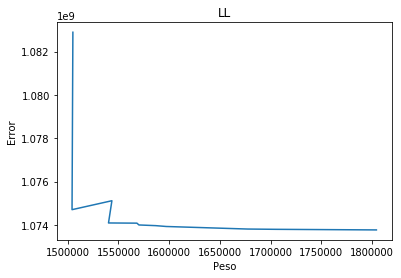

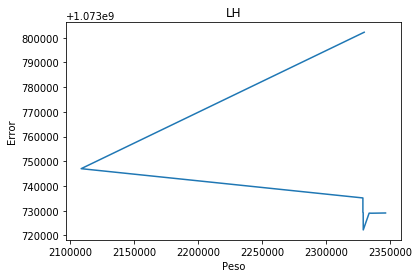

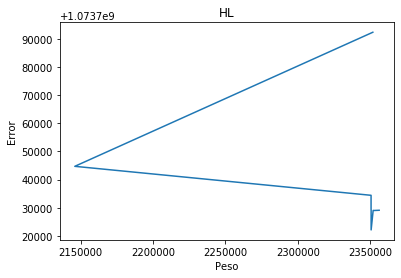

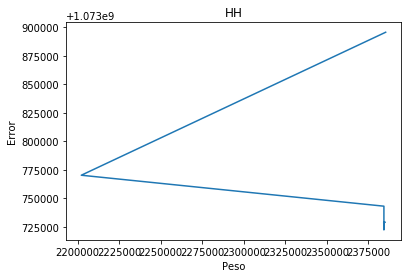

In [5]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
resultado_total = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
s = Sumando()
imagen = 2
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:     
        for banda in ["LL", "LH", "HL", "HH"]:
            pesos = s.GetPesosSubbandas(str(tipo), str(q_step),banda,imagen)
            MSE = 0.0
            MSE += s.GetMSESubbanda(tipo,imagen,q_step,banda)
            resultado_total[banda].append([pesos,MSE]) 
print(resultado_total)
plt.figure()
diccionario = resultado_total
for tipo in diccionario:
    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
    plt.ylabel('Error')
    plt.xlabel('Peso')
    plt.title(tipo)
    plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Lists of operational RD (Rate/Distortion) points
print(resultado_total)
LL = resultado_total["LL"]
LH = resultado_total["LH"]
HL = resultado_total["HL"]
HH = resultado_total["HH"]

{'LL': [[1804475.0, 1073769640.7748113], [1704885.0, 1073797184.7496226], [1677625.0, 1073809829.1148062], [1597105.0, 1073927903.1178768], [1586760.0, 1073966860.9283893], [1570215.0, 1073998252.5462399], [1568205.0, 1074081616.4275825], [1540170.0, 1074090531.1399426], [1543520.0, 1075116310.4262815], [1504200.0, 1074704126.0150924], [1505025.0, 1082889536.3628936]], 'LH': [[2346225.0, 1073729066.0738486], [2335550.0, 1073728971.9947957], [2333425.0, 1073729000.998699], [2328845.0, 1073722213.5510799], [2328790.0, 1073729186.4971637], [2328560.0, 1073729327.2468385], [2328560.0, 1073729621.5398908], [2328560.0, 1073731613.9377049], [2328560.0, 1073735152.8503773], [2108715.0, 1073746997.847567], [2329570.0, 1073802200.2516785]], 'HL': [[2356280.0, 1073729098.5284413], [2352890.0, 1073729019.2015092], [2352135.0, 1073729041.35847], [2350735.0, 1073722112.3121519], [2350735.0, 1073729246.9347385], [2350690.0, 1073729394.2443403], [2350690.0, 1073729642.2641686], [2350690.0, 1073731452.

In [8]:
# Slopes of each pair of points
total = []
for sub in resultado_total:
    slopes1 = [] 
    curve1 = resultado_total[sub]
    for i in range(len(curve1)-1):
        slope = (curve1[i][1]-curve1[i+1][1])/(curve1[i+1][0]-curve1[i][0])
        slopes1.append((slope, curve1[i+1][0], sub))
    total = total + slopes1
print(total)

[(0.2765737002843211, 1704885.0, 'LL'), (0.4638431835506912, 1677625.0, 'LL'), (1.4663934807574874, 1597105.0, 'LL'), (3.7658589185638207, 1586760.0, 'LL'), (1.8973477093104907, 1570215.0, 'LL'), (41.47456783216391, 1568205.0, 'LL'), (0.3179851029122048, 1540170.0, 'LL'), (-306.2027720414347, 1543520.0, 'LL'), (-10.482818188938944, 1504200.0, 'LL'), (-9921.709512486314, 1505025.0, 'LL'), (-0.008813026035139098, 2335550.0, 'LH'), (0.0136488956563613, 2333425.0, 'LH'), (-1.4819754626813413, 2328845.0, 'LH'), (126.7808378869837, 2328790.0, 'LH'), (0.6119551078132961, 2328560.0, 'LH'), (-inf, 2328560.0, 'LH'), (-inf, 2328560.0, 'LH'), (-inf, 2328560.0, 'LH'), (0.05387885642047901, 2108715.0, 'LH'), (-0.2499486274315064, 2329570.0, 'LH'), (-0.02340027494768126, 2352890.0, 'HL'), (0.02934696784872093, 2352135.0, 'HL'), (-4.949318798610142, 2350735.0, 'HL'), (-inf, 2350735.0, 'HL'), (3.2735467063056096, 2350690.0, 'HL'), (-inf, 2350690.0, 'HL'), (-inf, 2350690.0, 'HL'), (-inf, 2350690.0, 'HL'

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [9]:
sorted_lists = sorted(total, key=lambda tup: tup[0])[::-1]
print(sorted_lists)

[(126.7808378869837, 2328790.0, 'LH'), (55.800515222549436, 2384370.0, 'HH'), (41.47456783216391, 1568205.0, 'LL'), (3.7658589185638207, 1586760.0, 'LL'), (3.2735467063056096, 2350690.0, 'HL'), (1.8973477093104907, 1570215.0, 'LL'), (1.4663934807574874, 1597105.0, 'LL'), (0.6119551078132961, 2328560.0, 'LH'), (0.4638431835506912, 1677625.0, 'LL'), (0.3179851029122048, 1540170.0, 'LL'), (0.2765737002843211, 1704885.0, 'LL'), (0.14902509741670034, 2202250.0, 'HH'), (0.05387885642047901, 2108715.0, 'LH'), (0.05031839897690028, 2146020.0, 'HL'), (0.02934696784872093, 2352135.0, 'HL'), (0.0136488956563613, 2333425.0, 'LH'), (0.003846387399567498, 2384345.0, 'HH'), (-0.008813026035139098, 2335550.0, 'LH'), (-0.02340027494768126, 2352890.0, 'HL'), (-0.16777736638721666, 2384250.0, 'HH'), (-0.23146119241291357, 2351915.0, 'HL'), (-0.2499486274315064, 2329570.0, 'LH'), (-0.6842741975319883, 2385420.0, 'HH'), (-1.4819754626813413, 2328845.0, 'LH'), (-4.949318798610142, 2350735.0, 'HL'), (-10.482

In [10]:
R = 15908500 # Bit budget
spent = 0
i = 0
optimal = []
while True:
    spent += sorted_lists[i][1]
    if spent < R:
        optimal.append(sorted_lists[i])
    else:
        break
    i += 1
print("Optimal RD points =", optimal)
br = sum([i[1] for i in optimal])
print("bit-rate =", br)

Optimal RD points = [(126.7808378869837, 2328790.0, 'LH'), (55.800515222549436, 2384370.0, 'HH'), (41.47456783216391, 1568205.0, 'LL'), (3.7658589185638207, 1586760.0, 'LL'), (3.2735467063056096, 2350690.0, 'HL'), (1.8973477093104907, 1570215.0, 'LL'), (1.4663934807574874, 1597105.0, 'LL'), (0.6119551078132961, 2328560.0, 'LH')]
bit-rate = 15714695.0
